In [1]:
import numpy as np
import pandas as pd

In [2]:
#Getting the two seperate csv files using pandas.
train_df = pd.read_csv(r'C:\Users\Lenovo\SSN Study Materials\ML My Works\Data Science Projects\Loan Prediction\train.csv')
test_df = pd.read_csv(r'C:\Users\Lenovo\SSN Study Materials\ML My Works\Data Science Projects\Loan Prediction\test.csv')

Let's check their shapes.

In [3]:
print(train_df.shape)
print(test_df.shape)

(614, 13)
(367, 12)


<h1>Data Preprocessing and EDA</h1>

In [4]:
train_df.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


For non-numerical features,


In [7]:
train_df.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001658,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Let's understand what we got from here one by one. <br>
**Features** Gender(1),Married(2), Dependents(3), Education(4), Self_Employed(5), Property_Area(11), and Loan_Status(12) are object data type. <br>
**Features** Gender(1), Married(2), Dependents(3), Self_Employed(5), LoanAmount(8), Loan_Amount_Term(9), Credit_History(10) have some of their data missing.<br>
We can also see that some of the features may be categorical.

Let's check the number of features containing NaN and number of unique values in each feature.

In [8]:
train_df.isnull().sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We can see that not only train but also some data is missing in case of test datasets.

In [10]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
test_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

<h2>Categorical Data</h2>

We can see that the  following features are categorical:
* Gender
* Married
* Dependents
* Education
* Self_Employed
* Credit_History
* Property_Area
<br>and, <br>
* Loan_Status

The most thing we can understand, even from the data description, that our target variable (Loan_Status) contains 2 possibility. Thus, it is a binary classification problem.

From the data description, as well as on checking some data, we can see that under what categories they are divided. Let's first set the target variable which either 'Yes' or 'No' to 1 or 0. 

In [13]:
target_map={"Y":1, "N": 0}
dataset=[train_df]
for data in dataset:
    data['Loan_Status']=data['Loan_Status'].map(target_map)

We need to map the rest of the categorical variables but this time to both training and test dataset. But before 
doing it, we should fill the missing values with the mode of the corresponding features.

In [14]:
cat_cols=['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in cat_cols:
    train_df[col].fillna(train_df[col].mode()[0],inplace=True)
    test_df[col].fillna(test_df[col].mode()[0],inplace=True)

Let's check if there are any missing values left for categorical features

Now, all that is left is to convert the object categorical data to numeric form

In [15]:
target=train_df['Loan_Status']
train_df=train_df.drop('Loan_Status',1)

In [16]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[train_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
train_df = train_df.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)
train_df['Dependents']=train_df['Dependents'].astype('float64')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [17]:
gender_map={"Male": 1,"Female": 0}
marry_map={"Yes":1,"No":0}
education_map={"Graduate": 1,"Not Graduate":0}
property_map={"Semiurban":2,"Urban":1,"Rural":0}
dataset=[test_df]
for data in dataset:
    data['Gender']=data['Gender'].map(gender_map)
    data['Married']=data['Married'].map(marry_map)
    data['Self_Employed']=data['Self_Employed'].map(marry_map)
    data['Education']=data['Education'].map(education_map)
    data['Property_Area']=data['Property_Area'].map(property_map)
#dependents contains numeric value except 3+, so we just need to replace 3+ with 3 and then  convert their type to numeric
test_df = test_df.replace({'Dependents': r'3+'}, {'Dependents': 3},regex=True)
test_df['Dependents']=test_df['Dependents'].astype('float64')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


Now, we have worked with our categorical data for both training and our test datasets

Let's check if there are any missing data that is left

In [19]:
train_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

Only LoanAmount and Loan_Amount_Term is left, let's see them.

In [20]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can see that Loan_Amount_Term has majority of data containing value 360, so it would be better if we replace the missing values with 360(most frequent value).

In [21]:
train_df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

But we cannot say the same for LoanAmount data, so it's better to replace it's missing value with it's median.

In [22]:
train_df['Loan_Amount_Term'].fillna(360,inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


We can see that training set has now no missing values and that all features are numeric type( except Loan_ID, which I think, for now, provides less information)<br>
Let's complete our test data too.

In [24]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [25]:
test_df['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
350.0      1
12.0       1
36.0       1
120.0      1
60.0       1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [26]:
test_df['LoanAmount'].value_counts()

150.0    12
125.0    11
110.0    10
120.0     9
90.0      9
         ..
159.0     1
155.0     1
257.0     1
112.0     1
234.0     1
Name: LoanAmount, Length: 144, dtype: int64

Well, like training set, we need to do the same in case of test set.

In [27]:
test_df['Loan_Amount_Term'].fillna(360,inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(),inplace=True)
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


Now, our test set is ready

Let's see a correlation heatmap to visualize how are features correlated.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine

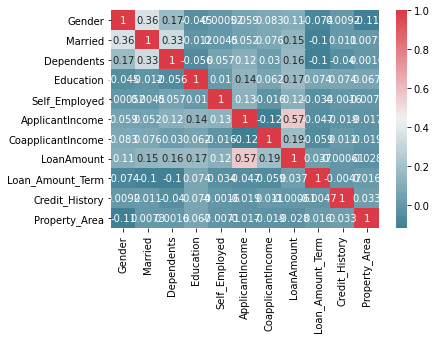

In [30]:
corr=train_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

We can see that features are not correlated to each other as much.

Before fitting the model, let's normalize the features of LoanAmount and Loan_Amount_term

In [31]:
features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [32]:
for fea in features:
    print(train_df[fea].value_counts(sort=True))
    print('---------------------------')

1    502
0    112
Name: Gender, dtype: int64
---------------------------
1    401
0    213
Name: Married, dtype: int64
---------------------------
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
---------------------------
1    480
0    134
Name: Education, dtype: int64
---------------------------
0    532
1     82
Name: Self_Employed, dtype: int64
---------------------------
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
---------------------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
---------------------------
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int6

The features whose values are to be normalized are--

In [33]:
fea_normalize=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area']

In [34]:
for fea in fea_normalize:
    train_df[fea]=(train_df[fea])/(train_df[fea].max())

<h1>Base Model</h1>

Since, it is a binary classification problem, we would be solving using Decision Tree Classifier and Logisitics Regression. Let's see one by one. But before, let's split our training data to training and validation

In [35]:
train_df=train_df.drop('Loan_ID',1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train,y_val= train_test_split(train_df,target,test_size=0.30, random_state=np.random.randint(0,100))

# Logitics Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
from sklearn import metrics

In [41]:
y_pred=lr.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.827027027027027


With Logistics Regression, the accuracy came to be 0.82

In [42]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [45]:
y_pred_cv=clf.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred_cv)
print(acc)

0.827027027027027


<h2>Decision Tree Classifier</h2>

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [47]:
dt_base=DecisionTreeClassifier(max_depth=10,random_state=4)
dt_base.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10, random_state=4)

The evaluation metric here is accuracy. So, let's check it's accuracy

In [48]:
from sklearn import metrics

In [49]:
y_pred=dt_base.predict(X_val)
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.772972972972973


We can see that our base model is 77% accurate. 

<h3>HyperParameter Tuning</h3>

In [50]:
dt_base.tree_.node_count

135

In [51]:
param_grid = {
    'max_depth' : range(4,25),
    'min_samples_leaf' : range(20,200,10),
    'min_samples_split' : range(20,200,10),
    'criterion' : ['gini','entropy'] 
}
n_folds = 5

We are using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
dt = DecisionTreeClassifier(random_state=np.random.randint(0,100))
grid = GridSearchCV(dt, param_grid, cv = n_folds, return_train_score=True,verbose=3)
#grid.fit(X_train,y_train)

In [54]:
#grid.best_params_

Let's train our best model and find it's accuracy.

In [55]:
best_tree=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=20,min_samples_split=80,random_state=np.random.randint(0,100))
best_tree.fit(X_train,y_train)
y_pred_best=best_tree.predict(X_val)

In [56]:
acc = metrics.accuracy_score(y_val,y_pred)
print(acc)

0.772972972972973


Our accuracy score is increased to 78.9%

Let's predict the results for test file and store in csv file

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.5+ KB


In [58]:
loanID=test_df['Loan_ID']
test_df=test_df.drop('Loan_ID',1)

In [59]:
y_pred_t=lr.predict(test_df)
y_final=[]
for y in y_pred_t:
    if y==1:
        y_final.append("Y")
    elif y==0:
        y_final.append("N")
y_best=np.array(y_final)
type(y_best)
      

numpy.ndarray

In [60]:
submission = pd.DataFrame({
        "Loan_ID": loanID,
        "Loan_Status": y_best
    })
submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N
